In [2]:
import pandas as pd
import gensim
import numpy as np
import emoji
import os
import ast

In [3]:
def get_individual_emojis(sequence):
    return [emoji_token.chars for emoji_token in emoji.analyze(sequence)]

In [4]:
data_dir = "./Data/2024-05-07-13-10"

# Load data from CSV
tweets_with_emojis = pd.read_csv(
    f"{data_dir}/tweets_with_emojis_dataframe.csv", index_col=0
)

# Convert string representation of lists to actual lists
tweets_with_emojis["EmojiSequences"] = tweets_with_emojis["EmojiSequences"].apply(
    ast.literal_eval
)

In [ ]:
# Filter sequences with at least two emojis
filtered_sequences = [
    sequence
    for list_of_sequences in tweets_with_emojis["EmojiSequences"]
    for sequence in list_of_sequences
    if emoji.emoji_count(sequence) > 1
]

In [5]:
# Load embeddings
sgns_vec_file = os.path.join(data_dir, "model_tweets_with_emojis_sgns.vec")
sgns_embeddings = gensim.models.KeyedVectors.load_word2vec_format(sgns_vec_file)

cbow_vec_file = os.path.join(data_dir, "model_tweets_with_emojis_cbow.vec")
cbow_embeddings = gensim.models.KeyedVectors.load_word2vec_format(cbow_vec_file)

In [23]:
[emoji_token.chars for emoji_token in emoji.analyze("😂😂😂")]

['😂', '😂', '😂']

In [18]:
filtered_sequences = []
for list_of_sequences in tweets_with_emojis["EmojiSequences"].values.tolist():
    for sequence in list_of_sequences:
        if emoji.emoji_count(sequence) > 1:
            filtered_sequences.append(sequence)

filtered_sequences

['💀💀',
 '😭😭😭😭😭',
 '🤣💀',
 '😭😭😭😭',
 '💰💰',
 '😭😂',
 '😐😐😐',
 '😖😖',
 '🪐🤍',
 '😂😂😂',
 '⭐🌊',
 '🔥🔥🔥🔥🔥',
 '🥲🥲',
 '🥲🥲',
 '🤣🤣🤣',
 '🙏♥',
 '😄😄',
 '😳😳',
 '😂😂',
 '😂😂😂',
 '🚬❤',
 '🤣🤣🤣🤣🤣',
 '😍😍',
 '😍😍',
 '🤧🤧🤧🤧🤒🤒🤒',
 '😍😍',
 '💥💥💥🚀💥💥💥',
 '😂🔥',
 '🌋💥💯',
 '💪🇸🇩',
 '👍🏼👍🏼👍🏼',
 '😅💛',
 '🤣🤣🤣',
 '🤯🤯🤯',
 '😭😭',
 '😭😭',
 '🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍',
 '🤦😂',
 '😂😂',
 '😂😂😭',
 '🎅🏼🎄',
 '🚀🚀🚀',
 '🥰🥰🥰',
 '😂😂😂😂😂😂',
 '😎😎😎🤩🤩👉🏻😰😍😏😍😇🐍🙁💞✨❤',
 '🌙🦍',
 '😂😂😂♥',
 '😊😊😊😊😊😊😊😊😊',
 '😂😂😂😂',
 '😭😂',
 '😂😂😂😂',
 '🎁🎁',
 '😂😂😂😂😂',
 '😭😂',
 '🙃🙂🙃',
 '🤣🤣',
 '😊😊',
 '❤🙋🏻',
 '😭😭',
 '🥺💙',
 '😭😭😭',
 '😊😊😊',
 '🤗💞😁😁',
 '😂🤣🤣',
 '😹😹',
 '😅😅😅',
 '🇱🇻☃',
 '😆😆😆',
 '😍😍',
 '🍀🍀💪💪',
 '😂😂😂',
 '😂😂😂',
 '😂😂😂😂😂😂😂',
 '😂😂😂',
 '😂😂😂😂',
 '💥🙏',
 '👍🤡',
 '😭😭',
 '😂😂😂',
 '😭😭',
 '🚨🏪',
 '😩😩😩',
 '😐🙃👍',
 '😂😂😂😂',
 '😂😂😂',
 '😂😂',
 '🥺❤',
 '😊👍',
 '🐢🐢🐢',
 '😂😂😂😂',
 '💥💥💥',
 '🙃😅',
 '🐐💯',
 '🤮🤮🤮🤮',
 '🗣📝',
 '🌙🦍',
 '🔥🦍',
 '🦍🌙',
 '😂🤣😁',
 '🤣🤣',
 '🌙🦍',
 '😂😂😂',
 '😂😂',
 '👌💪💪',
 '💀💀💀',
 '😂😂😂😂😂',
 '🤣🤣🤣',
 '😢🥰😘',
 '😉❤',
 '😂😂😂',
 '🙄😅',
 '😂😂😂',
 '😂😂',
 '😂😂',
 '😂😂😂',
 '👊👊',
 '😂😂',
 '🤣🤣🤣',
 '💀💀',
 '🏃🏾💨',
 '👊👊',
 '😉😊',
 '😢😢',
 '🤢🤮',

In [38]:
tweets_with_emojis.dropna()[
    tweets_with_emojis.dropna()["SeparatedText"].str.contains("🐶🐶😊")
]

,City,Lang,Time,Text,Geohash,Country,Region,CleanedText,Emojis,SeparatedText,EmojiSequences
3504373,kimje,ko,2021-12-17 03:04:28,귀여운 dog🐶🐶😊 https://t.co/OcS1DQaeaB,wy65xmmxv66s,kr,asia_east,귀여운 dog🐶🐶😊,🐶🐶😊,귀여운 dog 🐶🐶😊,[🐶🐶😊]


In [6]:
import fasttext
from sklearn.metrics.pairwise import cosine_similarity

compositional_similarity = pd.DataFrame(columns=['ModelType', 'Sequence', 'CompositionalSimilarity'])

for model_type, model_file in [("cbow", f"{data_dir}/model_tweets_with_emojis_cbow.bin"), ("sgns", f"{data_dir}/model_tweets_with_emojis_sgns.bin")]:
    model = fasttext.load_model(model_file)

    all_sequences = [w for w in model.get_words() if emoji.emoji_count(w) > 1]

    for seq in all_sequences:
        not_all_emojis_in_model = False
        for individual_emoji in get_individual_emojis(seq):
            if individual_emoji not in model:
                # print(f"not all individual emojis in sequence '{seq}' are in model")
                not_all_emojis_in_model = True

        if not_all_emojis_in_model:
            continue

        sum_of_individual = sum(
                [
                    model[individual_emoji]
                    for individual_emoji in get_individual_emojis(seq)
                ]
            )
        # print(sum_of_individual)
        # print(np.size(sum_of_individual))    

        similarity = cosine_similarity(
            model[seq].reshape(1, -1),
            sum_of_individual.reshape(1, -1),
        )[0][0]

        # print()
        # print(f"{seq} {similarity}")

        row = pd.DataFrame([{'ModelType': model_type, 'Sequence': seq, 'CompositionalSimilarity': similarity}])
        compositional_similarity = pd.concat([compositional_similarity, row], ignore_index=True)

compositional_similarity.to_csv('Composition/2024-05-08-18-00/compositional_similarity.csv')
compositional_similarity

/var/folders/7l/7xyqb1qn2516ktkslhs8yly00000gn/T/ipykernel_26137/3996475369.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compositional_similarity = pd.concat([compositional_similarity, row], ignore_index=True)


,ModelType,Sequence,CompositionalSimilarity
0,cbow,😂😂😂,0.869757
1,cbow,😂😂,0.876681
2,cbow,🤣🤣🤣,0.864432
3,cbow,😂😂😂😂,0.835831
4,cbow,🤣🤣,0.851557
...,...,...,...
120305,sgns,😊🌸❤,0.605458
120306,sgns,😲😲😮,0.313945
120307,sgns,😎😍😂,0.492236
120308,sgns,🙏🙏🙏🌷🌷🌷🌷🌷🌷🌷,0.395235


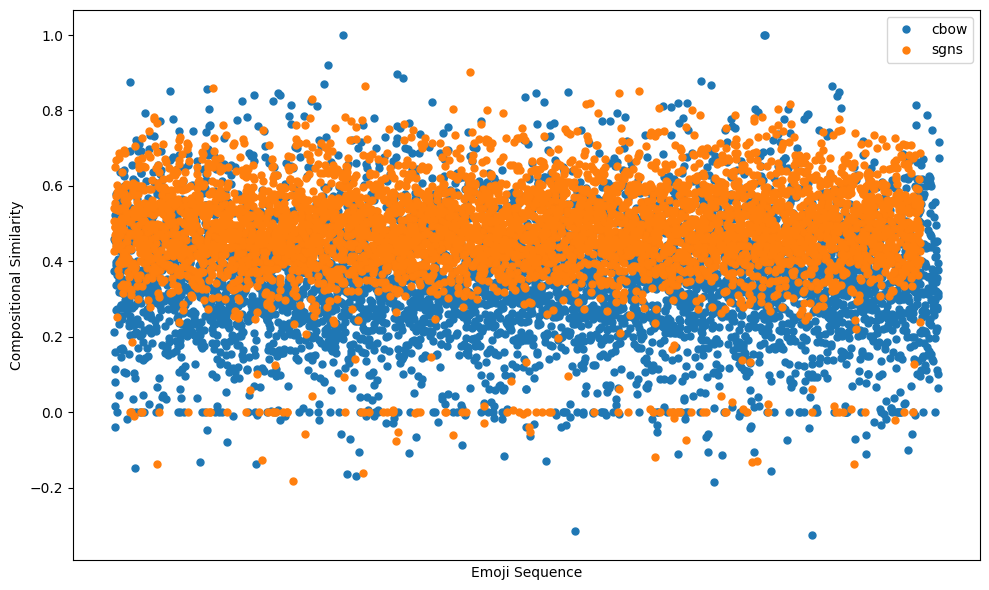

In [7]:
# import matplotlib.pyplot as plt

# # Sample size
# sample_size = 10000

# sample_data = compositional_similarity.sample(n=sample_size, random_state=42)

# # Group by ModelType
# grouped_data = sample_data.groupby('ModelType')

# plt.figure(figsize=(10, 6))
# for name, group in grouped_data:
#     x_values = range(len(group))
#     plt.plot(x_values, group['CompositionalSimilarity'], marker='o', linestyle='', ms=5, label=name)

# plt.xlabel('Emoji Sequence')
# plt.ylabel('Compositional Similarity')
# # plt.title('Compositional Similarity of Emoji Sequences (Sample)')
# plt.legend()
# plt.xticks([])
# plt.tight_layout()
# plt.savefig('Composition/2024-05-08-18-00/compositional_similarity.png')
# plt.show()
# TODO: Use in paper?

In [8]:
# Group by ModelType and calculate average similarity
average_similarity = compositional_similarity.groupby('ModelType')['CompositionalSimilarity'].mean()

average_similarity

ModelType
cbow    0.354678
sgns    0.478863
Name: CompositionalSimilarity, dtype: float32

In [9]:
# Group by ModelType and calculate standard deviation of similarity
similarity_std = compositional_similarity.groupby('ModelType')['CompositionalSimilarity'].std()

print(similarity_std)

ModelType
cbow    0.163126
sgns    0.124733
Name: CompositionalSimilarity, dtype: float32


In [11]:
def all_emojis_same(sequence):
    return len(set(get_individual_emojis(sequence))) <= 1

In [15]:
compositional_similarity_with_all_same = compositional_similarity
compositional_similarity_with_all_same['AllSameEmoji'] = compositional_similarity_with_all_same['Sequence'].apply(all_emojis_same)
compositional_similarity_with_all_same

,ModelType,Sequence,CompositionalSimilarity,AllSameEmoji
0,cbow,😂😂😂,0.869757,True
1,cbow,😂😂,0.876681,True
2,cbow,🤣🤣🤣,0.864432,True
3,cbow,😂😂😂😂,0.835831,True
4,cbow,🤣🤣,0.851557,True
...,...,...,...,...
120305,sgns,😊🌸❤,0.605458,False
120306,sgns,😲😲😮,0.313945,False
120307,sgns,😎😍😂,0.492236,False
120308,sgns,🙏🙏🙏🌷🌷🌷🌷🌷🌷🌷,0.395235,False


In [25]:
pd.pivot_table(compositional_similarity_with_all_same, values='CompositionalSimilarity', index='ModelType', columns='AllSameEmoji', aggfunc='mean')

AllSameEmoji,False,True
ModelType,,
cbow,0.346293,0.42091
sgns,0.480094,0.46914


In [20]:
compositional_similarity_with_all_same['CompositionalSimilarity'].mean()

0.41677058